In [251]:
import pandas as pd
import nltk
import os
import numpy as np

from  sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, LatentDirichletAllocation, NMF

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk import word_tokenize, pos_tag
import language_check

from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ProjectiveDependencyParser
from nltk.parse import (
     DependencyGraph,
     ProjectiveDependencyParser,
    NonprojectiveDependencyParser,
)
import winsound         # for sound  
import time             # for sleep
from collections import Counter
#from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
stop = stopwords.words('english')
import scipy
#REAL
#b0bcc6ff
pallette = {'REAL':'#b0bcc6ff','FAKE':'#c03639ff'}
langcheck = language_check.LanguageTool('en-US')

In [4]:
os.listdir('../data')

['fake_or_real_news.csv']

In [5]:
#challenge_df = pd.read_csv('train_bodies.csv',index_col=False) # Too specific 
#print('Fake News Challenge (Shape):', challenge_df.shape)

#http://www.kdnuggets.com/2017/04/machine-learning-fake-news-accuracy.html
kd_df = pd.read_csv('../data/fake_or_real_news.csv',index_col=0)
print('Fake News KD Nugget Solution (Shape):', kd_df.shape)

#kaggle_df = pd.read_csv('../fake.csv')
#print('Kaggle Fake News Dataset (shape):', kaggle_df.shape)

Fake News KD Nugget Solution (Shape): (6335, 3)


In [6]:
kd_df['labelint'] = kd_df.label.map({'FAKE':0,'REAL':1})
kd_df.head()

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   

                                                    text label  labelint  
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE         0  
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE         0  
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL         1  
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE         0  
875    It's primary day in New York and front-runners...  REAL         1

In [7]:
df_uppers = pd.DataFrame( columns = ['ArticleID','Word','Count'])

In [8]:


def get_upper_dicts(t):
    upper_dict = defaultdict(int)
    for w in nltk.word_tokenize(t):
        if w.upper() == w and w.isalpha() and len(w) > 1:
            upper_dict[w] += 1
    return upper_dict
            
def punctuation_counts(t, punc):
    punc_count = 0
    inQuotes = False
    for l in t:
        # ignore anything in quotes
        if l == "\"":
            if inQuotes:
                inQuotes = False
            else:
                inQuotes = True
            continue
            
        if l == punc and inQuotes is False:
            punc_count +=1
            
    return punc_count

kd_df['QuestionCount'] = kd_df.text.apply(lambda x : punctuation_counts(x , "?"))
kd_df['ExclamationCount'] = kd_df.text.apply(lambda x : punctuation_counts(x , "!"))
kd_df['Word'] = kd_df.text.apply(get_upper_dicts)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


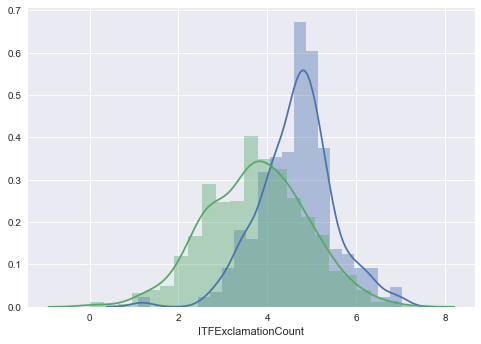

Ttest_indResult(statistic=-13.057626948863042, pvalue=1.4466905637895282e-36)

In [28]:
def ITF_punctuation(t, punc):
    allpunc_count = 0
    punc_count = 0
    inQuotes = False
    for l in t:
        # ignore anything in quotes; should have just used regex
        if l == "\"":
            if inQuotes:
                inQuotes = False
            else:
                inQuotes = True
            continue
            
        if l == punc and inQuotes is False:
            punc_count +=1
            
        if l in string.punctuation:
            allpunc_count += 1
    if punc_count == 0:
        return pd.np.nan
        
    try:
        return -1*np.log(punc_count/allpunc_count)
    except ZeroDivisionError:
        # Zero Error
        return pd.np.nan
#kd_df['ITFExclamationCount'] = kd_df.text.apply(lambda x : ITF_punctuation(x , "!"))
sns.distplot(kd_df['ITFExclamationCount'][(kd_df.label=='REAL') & (kd_df.ITFExclamationCount.notnull())])
sns.distplot(kd_df['ITFExclamationCount'][(kd_df.label=='FAKE') & (kd_df.ITFExclamationCount.notnull())])
plt.show()

scipy.stats.ttest_ind(kd_df['ITFExclamationCount'][(kd_df.label=='FAKE') & (kd_df.ITFExclamationCount.notnull())],
                     kd_df['ITFExclamationCount'][(kd_df.label=='REAL') & (kd_df.ITFExclamationCount.notnull())])

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


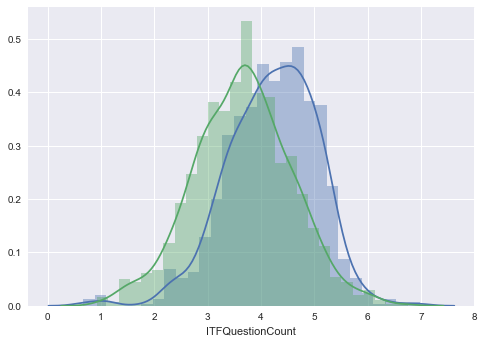

Ttest_indResult(statistic=-15.781296878305556, pvalue=1.2819713491617029e-53)

In [221]:
#Questions
kd_df['ITFQuestionCount'] = kd_df.text.apply(lambda x : ITF_punctuation(x , "?"))
sns.distplot(kd_df['ITFQuestionCount'][(kd_df.label=='REAL') & (kd_df.ITFQuestionCount.notnull())])
sns.distplot(kd_df['ITFQuestionCount'][(kd_df.label=='FAKE') & (kd_df.ITFQuestionCount.notnull())])
plt.show()

scipy.stats.ttest_ind(kd_df['ITFQuestionCount'][(kd_df.label=='FAKE') & (kd_df.ITFQuestionCount.notnull())],
                     kd_df['ITFQuestionCount'][(kd_df.label=='REAL') & (kd_df.ITFQuestionCount.notnull())])

In [230]:
print(kd_df.ITFExclamationCount.describe())
print(kd_df.ITFQuestionCount.describe())

kd_df.ITFExclamationCount[kd_df.ITFQuestionCount.notnull()].shape

count    1220.000000
mean        3.995087
std         1.138290
min        -0.000000
25%         3.254871
50%         4.049169
75%         4.797848
max         7.284821
Name: ITFExclamationCount, dtype: float64
count    2568.000000
mean        3.905238
std         0.924826
min         0.666479
25%         3.295837
50%         3.925268
75%         4.574711
max         6.972606
Name: ITFQuestionCount, dtype: float64


(2568,)

In [11]:




# No difference
#plt.hist(kd_df.QuestionCount[kd_df.labelint == 0],bins=np.arange(30),color='b')
#plt.hist(kd_df.QuestionCount[kd_df.labelint == 1],bins=np.arange(30),color='g')
#plt.title("Question Counts")
#plt.show()



print("Real News")
print(kd_df[kd_df.labelint == 1]['ExclamationCount'].describe())

print("Fake News")
print(kd_df[kd_df.labelint == 0]['ExclamationCount'].describe())

Real News
count    3171.000000
mean        0.194576
std         0.760820
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: ExclamationCount, dtype: float64
Fake News
count    3164.000000
mean        0.767067
std         3.046968
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       104.000000
Name: ExclamationCount, dtype: float64


#### Look for all the capitalized words

####### Because there are sing capitalized words look for a series fo capitalized words

In [10]:
all_words = {}

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()


def isCapitalizedString(text, cap_grams = 2, split_sentence=False):        
    if split_sentence:
        return sum([isCapitalizedString(s) for s in nltk.sent_tokenize(text)])
        #print(x)
        #print()
        #print(text)

    #remove punctuation
    t = "".join([x for x in text  if x.isalpha() or x == ' '])
    
    #if at least [cap_grams] words are capitalized together return True
    if any(x.isupper() for x in 
           map(lambda x : " ".join(x), 
               nltk.ngrams([w for w in nltk.word_tokenize(t) if not w.isnumeric()], cap_grams))):
        #return [" ".join(upper_gram) for upper_gram in nltk.ngrams(nltk.word_tokenize(t), cap_grams) if " ".join(upper_gram).isupper()]
        return 1
    else:
        return 0
        #return False
    


kd_df['capitalizedWords'] = kd_df['text'].apply(lambda x: isCapitalizedString(x[15:] , 2, True)) #Skipping the city in the beginning of some articles
kd_df['capitalized3Words'] = kd_df['text'].apply(lambda x: isCapitalizedString(x[15:] , 3, True)) #Skipping the city in the beginning of some articles

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: generator 'ngrams' raised StopIteration


In [11]:
kd_df[kd_df.capitalizedWords >= 1].groupby('label')['capitalizedWords'].count()

kd_df[(kd_df.label == 'REAL') & (kd_df.capitalizedWords >= 1)]
ex = kd_df[(kd_df.label == 'REAL') & (kd_df.capitalizedWords == 1)].iloc[6].text
ex
[print(x) for x in nltk.sent_tokenize(ex) if isCapitalizedString(x,2,True) >= 1]

The quarrel continued into this week, as Trump tweeted that Khan had “viciously attacked” him and had shifted focus from the real concern, “RADICAL ISLAMIC TERRORISM.” The GOP nominee faced strong criticism from a bipartisan group of decorated combat veterans, members of Congress and family members of slain soldiers.


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: generator 'ngrams' raised StopIteration


[None]

In [12]:
kd_df[(kd_df.label == 'REAL') & (kd_df.capitalizedWords >= 1)]
ex = kd_df[(kd_df.label == 'REAL') & (kd_df.capitalizedWords == 1)].iloc[3].text
ex
[print(x) for x in nltk.sent_tokenize(ex) if isCapitalizedString(x,2,True) >= 1]

Many carried signs of support for the victims of the Charleston shooting and the black community: "STILL WE RISE," "Hand in Hand," "Do the right thing," "Black Lives Matter," signs read.


[None]

## POS Tag each of the headlines to see if there's "Fakeness" sentence structure across Fake articles

In [13]:

nltk.help.upenn_tagset()
wordnet.synsets('liking')[1].lemma_names()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

['wish', 'care', 'like']

In [14]:
#pdp = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
sent = 'I shot an elephant in my pajamas'
#trees = pdp.parse(sent)
from nltk.grammar import DependencyGrammar
import string

kd_df['pos_title'] = kd_df.title.apply(lambda x : " ".join([x[1] for x in pos_tag(word_tokenize(x.lower())) if x[0] not in string.punctuation and x[1] != ' ']))



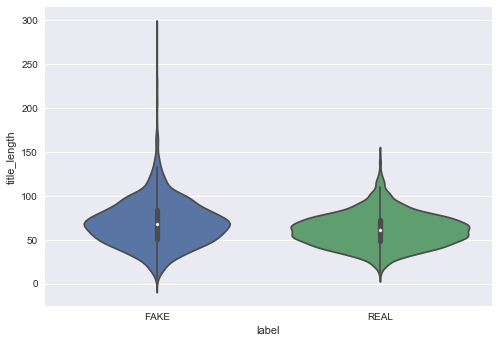

In [15]:
kd_df['title_length'] = kd_df.title.apply(lambda x: len(x))
kd_df['title_sentences'] = kd_df.title.apply(lambda x: len(nltk.sent_tokenize(x)))

sns.violinplot('label', 'title_length',data = kd_df)
plt.show()

In [16]:
N_GRAMS = 3

GET_TOP = 100
fake_grams = []
for posgrams in kd_df[kd_df.label == 'FAKE'].pos_title:
     for n in nltk.ngrams(word_tokenize(posgrams),N_GRAMS):
            fake_grams.append(n)

real_grams = []
for posgrams in kd_df[kd_df.label == 'REAL'].pos_title:
     for n in nltk.ngrams(word_tokenize(posgrams),N_GRAMS):
            real_grams.append(n)            
            
fd = dict(nltk.FreqDist(fake_grams))
rd = dict(nltk.FreqDist(real_grams))

top_fd = {}
top_rd = {}
for f,r in zip(sorted(fd, key=fd.get, reverse=True)[:12],
             sorted(rd, key=rd.get, reverse=True)[:12]):
    print('FAKE', f, fd[f])
    print('REAL', r, rd[r])
    top_fd[f] = fd[f]
    top_rd[r] = rd[r]
    

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: generator 'ngrams' raised StopIteration


FAKE ('NN', 'NN', 'NN') 756
REAL ('NN', 'IN', 'NN') 620
FAKE ('NN', 'IN', 'NN') 679
REAL ('JJ', 'NN', 'NN') 537
FAKE ('JJ', 'NN', 'NN') 617
REAL ('IN', 'JJ', 'NN') 461
FAKE ('JJ', 'NN', 'IN') 463
REAL ('NN', 'NN', 'NN') 438
FAKE ('IN', 'JJ', 'NN') 445
REAL ('DT', 'JJ', 'NN') 404
FAKE ('DT', 'JJ', 'NN') 380
REAL ('JJ', 'NN', 'IN') 363
FAKE ('NN', 'IN', 'JJ') 380
REAL ('IN', 'NN', 'NN') 352
FAKE ('IN', 'NN', 'NN') 356
REAL ('NN', 'IN', 'JJ') 324
FAKE ('IN', 'DT', 'NN') 302
REAL ('NN', 'NN', 'VBZ') 291
FAKE ('NN', 'NN', 'IN') 291
REAL ('NN', 'NN', 'IN') 236
FAKE ('DT', 'NN', 'IN') 284
REAL ('NN', 'TO', 'VB') 231
FAKE ('JJ', 'JJ', 'NN') 278
REAL ('NNS', 'IN', 'NN') 217


In [17]:
d = top_fd.copy()
d.update(top_rd)
for k in sorted(d, key=d.get, reverse=True)[:24]:
    newKey = " ".join(k)
    d[newKey] = d.pop(k)
kd_df_POS = kd_df.copy()


for k in d:
    kd_df_POS[k] = kd_df_POS.pos_title.apply(lambda x : 1 if k in x else 0)
    

mdf = kd_df_POS[list(d.keys())+['labelint']]

In [18]:
bg = sm.GLM(mdf['labelint'],mdf.drop('labelint', axis=1), family=sm.families.Binomial())
bres = bg.fit()
print(bres.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               labelint   No. Observations:                 6335
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4359.1
Date:                Wed, 31 May 2017   Deviance:                       8718.3
Time:                        21:32:44   Pearson chi2:                 6.34e+03
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
NN IN NN       0.0618      0.075      0.829      0.407        -0.084     0.208
JJ NN NN      -0.0450      0.061     -0.738      0.4

<WordListCorpusReader in 'C:\\Users\\Daniel Frimer\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


C:\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


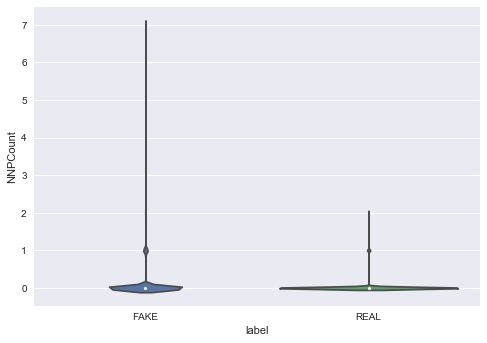

Comment on U.S. war with Iran has already begun by جنگ ارزی آمریکا علیه ایران / مورد مطالعاتی سال 1390 - کدآمایی FAKE

GERMANY: Parents outraged after German primary school ‘forces’ children to chant “Allahu Akbar” and “there is no God but Allah” in Muslim prayer FAKE

A perfect mashup of “Stranger Things” and “A Charlie Brown Christmas” FAKE

Comment on “This is My Second One” — Virginia Cop Caught Bragging About Killing Two Unarmed People by Jamieson FAKE

Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids FAKE

C праздником ребята и спасибо вам! FAKE

NYPD Source: Weiner Laptop Has Enough Evidence “to Put Hillary … Away for Life” FAKE

Aide Said He Was Running 'Bill Clinton Inc.' in New WikiLeaks Dump FAKE

VIDEO : Epic Loser Weiner Says He Downloaded ALL OF HUMA’S EMAILS By “ACCIDENT” – TruthFeed FAKE

Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids FAKE

Reductress » ‘How Am I Supposed To Explain This To My Children?’ Asks Melania Trump FAKE

Hillary’s “Big Te

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

kd_df['NNPCount'] = kd_df.pos_title.apply(lambda x: len([i for i in word_tokenize(x) if i =='NNP']))
#sns.regplot('NNPCount', 'title_length', data=kd_df[kd_df.label == 'FAKE'], color='red')
#sns.regplot('NNPCount', 'title_length', data=kd_df[kd_df.label == 'REAL'], color='green')

sns.violinplot('label','NNPCount', data=kd_df)
plt.show()

for r,i in kd_df.sort_values('NNPCount', ascending=False)[['title','label']].head(20).iterrows():
    print(i.title, i.label)
    print()

## The Best... Look for superlatives


In [124]:
def count_superlatives(text):
    return sum([1 for isjjs in pos_tag(word_tokenize(text.lower())) if isjjs[1].strip() in ('JJS','RBS')])


#kd_df['superlative_count_title'] = kd_df['title'].apply(count_superlatives)
kd_df['superlative_count'] = kd_df['text'].apply(count_superlatives)

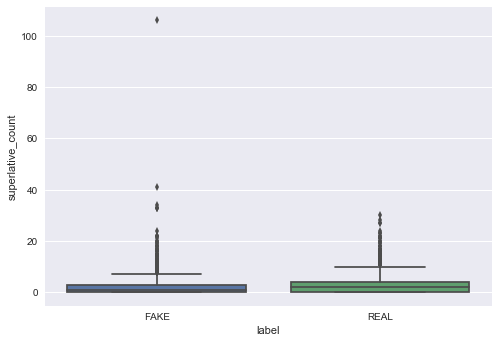

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


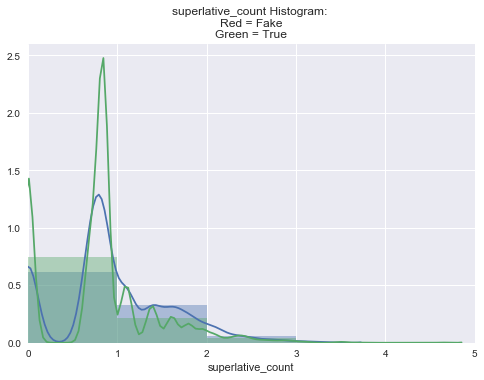

Ttest_indResult(statistic=-7.5320777963126737, pvalue=6.0496312422845351e-14)

In [147]:


#winsound.Beep(440, 250)

#sns.violinplot('label',['superlative_count_title','superlative_count'], data=kd_df)
#plt.show()


#sns.violinplot('label','superlative_count', data=kd_df)
#plt.show()

from scipy import stats

sns.boxplot(kd_df.label, kd_df.superlative_count)
plt.show()

sns.distplot(kd_df.superlative_count[kd_df.label == "REAL"].apply(lambda x: np.log(x) if x > 0 else np.log(kd_df.superlative_count.mean())),bins=np.arange(30))
sns.distplot(kd_df.superlative_count[kd_df.label  == "FAKE"].apply(lambda x: np.log(x) if x > 0 else np.log(kd_df.superlative_count.mean())),bins=np.arange(30))
#plt.hist(kd_df.superlative_count[kd_df.labelint == 1],bins=np.arange(30), alpha=.75,color='g')
plt.title("superlative_count Histogram: \nRed = Fake\nGreen = True")
plt.xlim(0,5)
plt.show()

scipy.stats.ttest_ind(kd_df.superlative_count[kd_df.label  == "FAKE"].apply(lambda x: np.log(x) if x > 0 else pd.np.nan)
                      ,kd_df.superlative_count[kd_df.label  == "REAL"].apply(lambda x: np.log(x) if x > 0 else pd.np.nan)
                     ,nan_policy='omit')

A little shocked that superlatives were more commonly found in real news than they were in fake.  Using words like the best, the worst, and funniest would have striked me as more opinionated but in this case not fake

In [24]:
def stopwords_ratio(self):
    



def remove_stopwords(t):
    return " ".join([x for x in word_tokenize(t.lower()) if x not in stop and x.isalpha()])

f = defaultdict(dict, [])
r = defaultdict(dict, [])

kd_df['text_nostopwords'] = kd_df.text.apply(remove_stopwords)
kd_df



In [25]:
d = zip(kd_df['label'].tolist(),kd_df['text_nostopwords'].apply(lambda x : nltk.bigrams(word_tokenize(x))).tolist())

mg = defaultdict(list,[])
ml = list(map(lambda x : mg[x[0]].append([i for i in x[1]]), d))



In [26]:
kd_df['bigrams_list'] = kd_df['text_nostopwords'].apply(lambda x : list(nltk.bigrams(word_tokenize(x))))



In [27]:
print(kd_df[(kd_df['bigrams_list'].apply(lambda x: True if ('hillary','clinton') in x else False))][kd_df.label=='FAKE'].text.iloc[6])

10-27-1 6 The first Bill and Hillary Clinton co-presidency included eight years of Balkan and other wars of aggression. Bush/Cheney exceeded their lawlessness. Obama outdid the worst of both previous administrations - attacking seven countries, destabilizing others, orchestrating coups in Honduras, Paraguay and Brazil, threatening Venezuelan democracy, enforcing puppet rule in Haiti, continuing Plan Colombia aid, responsible for massacres, disappearances and torture of regime opponents, along with instituting increasingly anti-Sino/Russia policies, risking confrontation with both countries. On October 27, the Wall Street Journal said 2016 electoral politics scrambled traditional positions on foreign policy and international intervention, obliterating many of the usual partisan distinctions and presenting political challenges for whoever wins in November. Hillary will likely exceed the worst of Obamas aggressiveness on the international stage, according to her public statements and 

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [28]:
pos_tag(word_tokenize('she is a planning coup'))

[('she', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('planning', 'NN'),
 ('coup', 'NN')]

In [29]:
from functools import reduce

submg = defaultdict(int)

all_fake_bigrams = reduce(lambda x,y : x  + y, mg['FAKE'])
all_real_bigrams = reduce(lambda x,y : x  + y, mg['REAL'])


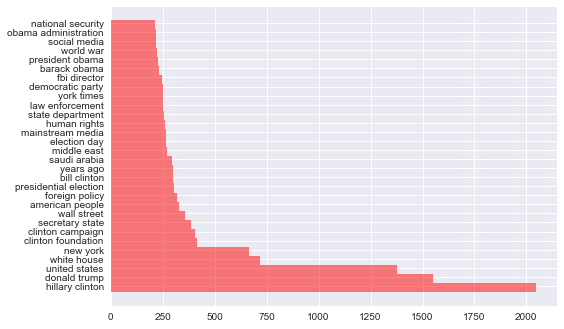

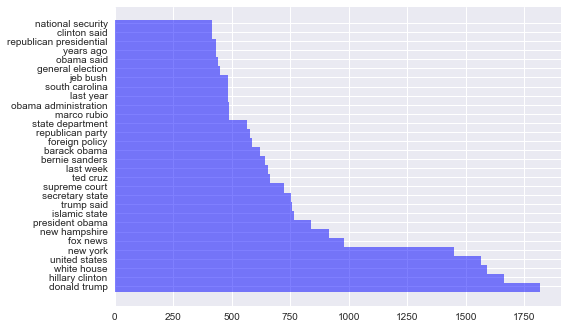

In [30]:
fake_counts = Counter(all_fake_bigrams)
real_counts = Counter(all_real_bigrams)

num_to_show = 30
labels = [" ".join(e[0]) for e in fake_counts.most_common(num_to_show)]
values = [e[1] for e in fake_counts.most_common(num_to_show)]
plt.barh(np.arange(len(labels)), values, 1,color='red', alpha = .5)
plt.yticks(np.arange(len(labels)) + 1 * 0.2, labels)
plt.show()


num_to_show = 30
labels = [" ".join(e[0]) for e in real_counts.most_common(num_to_show)]
values = [e[1] for e in real_counts.most_common(num_to_show)]
plt.barh(np.arange(num_to_show), values, 1, color='blue', alpha = .5)
plt.yticks(np.arange(num_to_show) + 1 * 0.2, labels)
plt.show()


### Look for average length in sentences

In [31]:
kd_df['avg_sent_wordlength'] = kd_df.text.apply(lambda x : np.mean([len(word_tokenize(x)) for x in nltk.sent_tokenize(x)]) if len(x.strip()) > 0 else 0)


####FAKE####
count    3164.000000
mean       27.791666
std        16.750811
min         0.000000
25%        21.198469
50%        26.074176
75%        31.333333
max       514.857143
Name: avg_sent_wordlength, dtype: float64
####REAL####
count    3171.000000
mean       25.688756
std         5.560405
min         6.000000
25%        22.354355
50%        25.367089
75%        28.750000
max        78.750000
Name: avg_sent_wordlength, dtype: float64


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


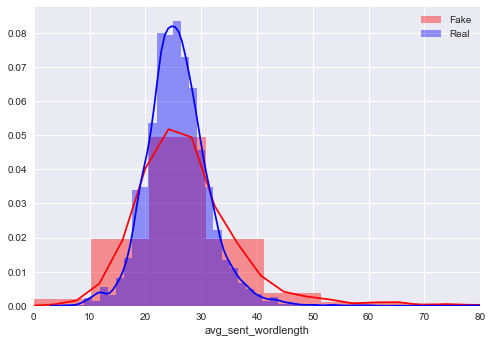

Removed outliers from fake news greater than 300 words per sentence


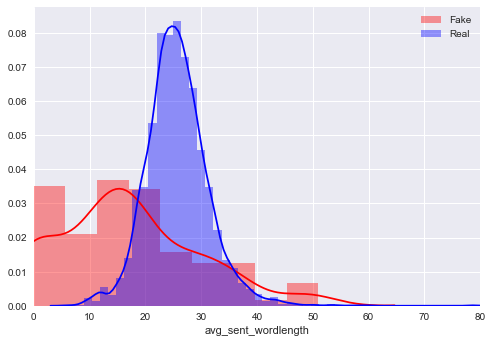

Here is the t-test with all the values taken into account.


Ttest_indResult(statistic=6.702736276566494, pvalue=2.3430264935027459e-11)

In [32]:
print("####FAKE####")
print(kd_df[kd_df.label == 'FAKE']['avg_sent_wordlength'].describe())
print("####REAL####")
print(kd_df[kd_df.label == 'REAL']['avg_sent_wordlength'].describe())
kd2_ = kd_df.copy()
kd2_.avg_sent_wordlength = kd2_.avg_sent_wordlength.apply(np.log)
#kd_df[kd_df.label == 'FAKE']['avg_sent_wordlength'].hist(color='red', bins = 100)
sns.distplot(kd_df[#(kd_df.text.str.len() < 300) &  #Remove Outliers
                           (kd_df.label == "FAKE")
                           ]['avg_sent_wordlength'],
             label='Fake', color='red')
sns.distplot(kd_df[(kd_df.label == "REAL")]['avg_sent_wordlength'], label='Real', color='blue')
plt.legend()
plt.xlim(0,80)
plt.show()

print("Removed outliers from fake news greater than 300 words per sentence")
sns.distplot(kd_df[(kd_df.text.str.len() < 300) &  #Remove Outliers
                           (kd_df.label == "FAKE")
                           ]['avg_sent_wordlength'],
             label='Fake', color='red')
sns.distplot(kd_df[(kd_df.label == "REAL")]['avg_sent_wordlength'], label='Real', color='blue')
plt.legend()
plt.xlim(0,80)
plt.show()


kd_df = kd_df[kd_df.avg_sent_wordlength.notnull()]
print("Here is the t-test with all the values taken into account.")
scipy.stats.ttest_ind(kd_df[(kd_df.label == "FAKE")]['avg_sent_wordlength'],
                      kd_df[kd_df.label == "REAL"]['avg_sent_wordlength'], equal_var = False)


It seems statistically significant even with the outliers kicked out of the Fake news.  Fake news seem to come in all shapes and sizes while distribution is skewed to the left, Real news has a more standard distribution.  Real news seems to have a concentration of about 20 words per sentence.  Fake news on the other hand seem to be either short outbursts or long drawn out poorly structured sentences


Now let's try it with number of sentences which reveal the length of the article rather than the sentence structure itself:

####FAKE####
count    3164.000000
mean       29.296460
std        48.118432
min         0.000000
25%         9.000000
50%        18.000000
75%        35.000000
max      1344.000000
Name: sent_len, dtype: float64
####REAL####
count    3171.000000
mean       39.319458
std        34.239532
min         1.000000
25%        20.000000
50%        34.000000
75%        50.000000
max       406.000000
Name: sent_len, dtype: float64


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


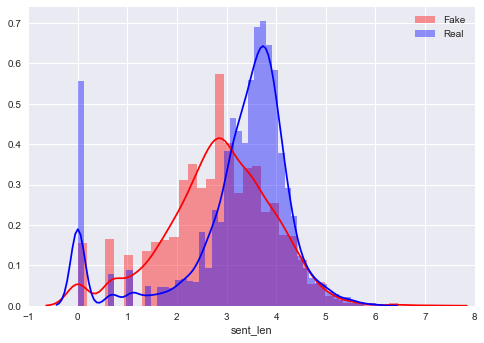

Ttest_indResult(statistic=14.478192187959747, pvalue=9.2779938690355704e-47)

In [190]:
kd_df['sent_len'] = kd_df.text.apply(lambda x : np.mean([len(nltk.sent_tokenize(x))]) if len(x.strip()) > 0 else 0)
print("####FAKE####")
print(kd_df[kd_df.label == 'FAKE']['sent_len'].describe())
print("####REAL####")
print(kd_df[kd_df.label == 'REAL']['sent_len'].describe())
kd2_ = kd_df.copy()
kd2_.sent_len = kd2_.sent_len.apply(np.log)
#kd_df[kd_df.label == 'FAKE']['avg_sent_wordlength'].hist(color='red', bins = 100)
sns.distplot(kd_df[(kd_df.label == "FAKE")]['sent_len'].apply(lambda x : np.log(x) if x > 0 else np.log(kd_df.sent_len.mean())),label='Fake',color='red')
sns.distplot(kd_df[(kd_df.label == "REAL")]['sent_len'].apply(lambda x : np.log(x) if x > 0 else np.log(kd_df.sent_len.mean())), label='Real', color='blue')
plt.legend()
plt.xlim(-1,8)
plt.show()



scipy.stats.ttest_ind(kd_df[(kd_df.label == "REAL")]['sent_len'].apply(lambda x : np.log(x) if x > 0 else np.log(kd_df.sent_len.mean()))
                      ,kd_df[(kd_df.label == "FAKE")]['sent_len'].apply(lambda x : np.log(x) if x > 0 else np.log(kd_df.sent_len.mean()))
                      ,equal_var = False,)


The distributions look the same similar and both have a pretty strong skew towardsa smaller set of sentences. Howeverthe means differ greatly and Fake news can be seen to have much less effort in writing them. as the number of sentences increases the less these two change and show more effort by  both fake and real articles

In [34]:
np.mean(len(nltk.sent_tokenize(kd_df.text.loc[5530])))

0.0

In [36]:
kd_df['avg_sent_charlength'] = kd_df.text.apply(lambda x : np.mean([len(x) for x in nltk.sent_tokenize(x)]))


C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [237]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


def named_entities_sentiment(t, specific_entities):
    calced_scores = []
    for s in nltk.sent_tokenize(t):
        named= nltk.ne_chunk(
                    nltk.pos_tag(
                        nltk.word_tokenize(s)
                        )
                    , binary=False)
        if any(isinstance(x, nltk.tree.Tree) and x._label in specific_entities for x in named):
            calced_scores.append(sid.polarity_scores(s)['compound']) # uses NLTK Vader
            #calced_scores.append(afinn.score(s))  # uses AFINN 
    if calced_scores:
        return np.mean(calced_scores)
    else:
        return 0
    
named_entities_sentiment("Syrian clinton bad", ["GPE"]) 

-0.5423

In [244]:
# Build the scores
kd_df['NE_Sentiment_specific'] = kd_df.text.apply(lambda x : named_entities_sentiment(x,["PERSON",'ORGANIZATION','FACILITY','GPE']))

title                  Radio Derb Is On The Air–Leonardo And Brazil’s...
text                                                                    
label                                                               FAKE
labelint                                                               0
QuestionCount                                                          0
ExclamationCount                                                       0
Word                                                                  {}
ITFExclamationCount                                                  NaN
sent_len                                                               0
superlative_count                                                      0
NE_Sentiment                                                         NaN
Name: 9337, dtype: object

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


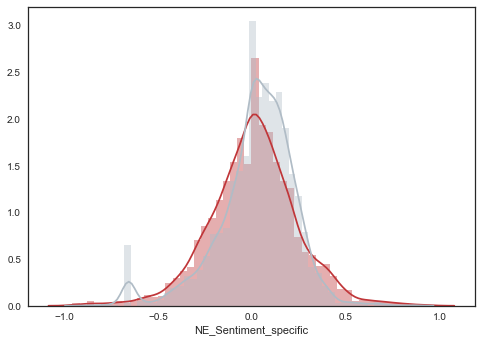

Ttest_indResult(statistic=2.4560428354619344, pvalue=0.01407430245571673)

In [254]:
#sns.distplot(kd_df[(kd_df.label == "FAKE")& (kd_df.NE_Sentiment.notnull())]['NE_Sentiment'].apply(np.log),label='Fake',color='red')
#sns.distplot(kd_df[(kd_df.label == "REAL")& (kd_df.NE_Sentiment.notnull())]['NE_Sentiment'].apply(np.log), label='Real', color='blue')
#plt.show()

sns.set_style("white")

sns.distplot(kd_df[(kd_df.label == "FAKE")& (kd_df.NE_Sentiment_specific.notnull())]['NE_Sentiment_specific'],label='Fake',color=pallette['FAKE'])
sns.distplot(kd_df[(kd_df.label == "REAL")& (kd_df.NE_Sentiment_specific.notnull())]['NE_Sentiment_specific'], label='Real', color=pallette['REAL'])
plt.show()

scipy.stats.ttest_ind(kd_df[(kd_df.label == "REAL")& (kd_df.NE_Sentiment_specific.notnull())]['NE_Sentiment_specific'],
                     kd_df[(kd_df.label == "FAKE")& (kd_df.NE_Sentiment_specific.notnull())]['NE_Sentiment_specific'])

In [249]:
print(kd_df[(kd_df.label == "REAL")].NE_Sentiment_specific.describe())
print(kd_df[(kd_df.label == "FAKE")].NE_Sentiment_specific.describe())


count    3171.000000
mean        0.022258
std         0.208941
min        -0.891000
25%        -0.072010
50%         0.044854
75%         0.154148
max         0.862500
Name: NE_Sentiment_specific, dtype: float64
count    3164.000000
mean        0.008551
std         0.234537
min        -0.957800
25%        -0.126478
50%         0.006973
75%         0.144317
max         0.952200
Name: NE_Sentiment_specific, dtype: float64


### Remove all named entities from the file

In [38]:
def remove_named_entities(i):
    words = nltk.word_tokenize(i)
    tagged = nltk.pos_tag(words)
    namedEnt = nltk.ne_chunk(tagged, binary=False)
    
    return " ".join([x[0] for x in namedEnt if not isinstance(x, nltk.tree.Tree)])

def named_entities_sentiment(t):
    
    for s in nltk.sent_tokenize(s):
        nltk.ne_chunk(
            nltk.pos_tag(
                nltk.word_tokenize(s)
            )
            , binary=False)

def build_synset_sent(i):
    return [wordnet.synsets(x) for x in word_tokenize(i)]
    
#



#remove_stopwords()

a = remove_named_entities("Hillary Clinton, and to the world, I am here and ready but likely annoyed")
d = defaultdict(list, [])
#g = lambda x : [syns[0].lemmas()]

def retrieve_all_synonyms(syns):
    try:
        return [i.name() for s in syns for i in s.lemmas()]
    except:
        print(syns.name())


def retireve_all_synonymouswords(text):
    try:
        r = reduce(lambda x,y : retrieve_all_synonyms(wordnet.synsets(x)) + retrieve_all_synonyms(wordnet.synsets(y)), word_tokenize(text))
    except:
        print(text)
    return r
    
retireve_all_synonymouswords("horrified by")
#build_synset_sent()[2][1].lemmas()
#mg = defaultdict(list,[])
#ml = list(map(lambda x : mg[x[0]].append([i for i in x[1]]), d))

kd_df['nameless_text'] = kd_df.text.apply(remove_named_entities)

kd_df['bag_of_syns']  = kd_df['nameless_text'].apply(retireve_all_synonymouswords)


, a at the , is a writer focusing on radical Islam . In the final stretch of the election , has gone to war with the . The word “unprecedented” has been thrown around so often this election that it ought to be retired . But it’s still unprecedented for the nominee of a major political party to go war with the . But that’s exactly what and her people have done . Coma patients just waking up now and watching an hour of from their hospital beds would assume that Director is Hillary’s opponent in this election . The is under attack by everyone from to . Hillary’s people have circulated a letter attacking . There are currently more media hit pieces lambasting him than targeting . It wouldn’t be too surprising if the or their allies were to start running attack ads against the . The FBI’s leadership is being warned that the entire left-wing establishment will form a lynch mob if they continue going after . And the FBI’s credibility is being attacked by the media and the to preemptively head 

UnboundLocalError: local variable 'r' referenced before assignment

In [39]:
def retrieve_all_synonyms(syns):
    words = []
    try:
        for s in syns:
            for l in s.lemmas():
                words.append(l.name())
    except:
        return []

    return words
def retireve_all_synonymouswords(text):
    words = []
    for w,p in pos_tag(word_tokenize(text)):
        
        if p in ('\'s', 'NNP') or w in stop:
            continue
        else:
            for sw in wordnet.synsets(w):
                for l in sw.lemmas():
                    words.append(l.name())
    if words:
        words.append(w)
    return words    

    
    
kd_df['bag_of_syns']  = kd_df['nameless_text'].apply(retireve_all_synonymouswords)

In [40]:
#winsound.Beep(600, 450)


#reduce(lambda x,y : wordnet.synsets(x) + wordnet.synsets(y), 
faked = {}
reald = {}
def addtodict(counted, d):
    for k in counted:
        d.setdefault(k,0)
        d[k]+=counted[k]

e = list(map(lambda x :  addtodict(Counter(x),faked), kd_df[kd_df.label=='FAKE']['bag_of_syns'].tolist()))
e = list(map(lambda x :  addtodict(Counter(x),reald), kd_df[kd_df.label=='REAL']['bag_of_syns'].tolist()))




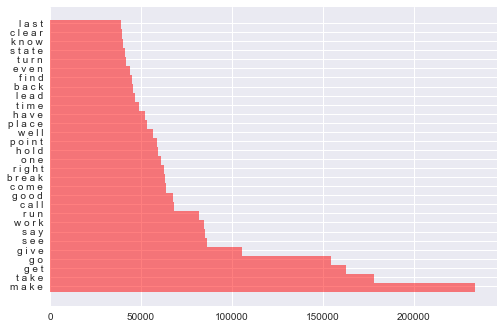

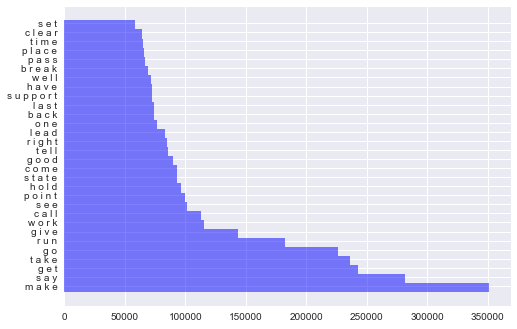

In [41]:
num_to_show = 30
labels = [" ".join(e[0]) for e in Counter(faked).most_common(num_to_show)]
values = [e[1] for e in Counter(faked).most_common(num_to_show)]
plt.barh(np.arange(len(labels)), values, 1,color='red', alpha = .5)
plt.yticks(np.arange(len(labels)) + 1 * 0.2, labels)
plt.show()


num_to_show = 30
labels = [" ".join(e[0]) for e in Counter(reald).most_common(num_to_show)]
values = [e[1] for e in Counter(reald).most_common(num_to_show)]
plt.barh(np.arange(num_to_show), values, 1, color='blue', alpha = .5)
plt.yticks(np.arange(num_to_show) + 1 * 0.2, labels)
plt.show()

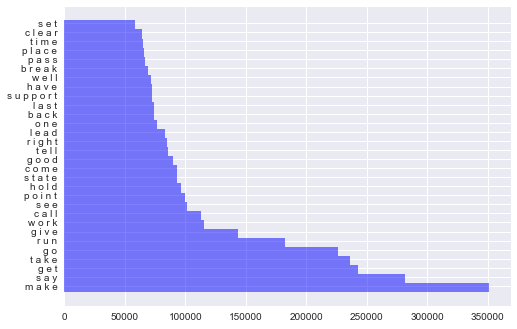

In [42]:
num_to_show = 30
labels = [" ".join(e[0]) for e in Counter(reald).most_common(num_to_show)]
values = [e[1] for e in Counter(reald).most_common(num_to_show)]
plt.barh(np.arange(num_to_show), values, 1, color='blue', alpha = .5)
plt.yticks(np.arange(num_to_show) + 1 * 0.2, labels)
plt.show()

In [43]:
for i in  word_tokenize(kd_df['nameless_text'].loc[0].lower()):
    print(i, wordnet.synsets(i))

KeyError: 'the label [0] is not in the [index]'

In [44]:
def getNonNounCounts(upperWordDict):
    c=0
    for k in upperWordDict:
        
        if nltk.pos_tag([k])[0][1] in ('NN','NNP'):
            continue
        else:
            c += upperWordDict[k]
        
    return c
kd_df['UpperNonNounCounts'] = kd_df['Word'].apply(lambda x : getNonNounCounts(x))

In [45]:
kd_df.sort_values('UpperNonNounCounts',ascending=False)

title  \
7220   Israel: Ancient Papyrus Proves Jerusalem Belon...   
565      The U.S. government’s predatory-lending program   
5765   Re: It Is Now Mathematically Impossible To Pay...   
8789    HILLARY WILL LAND IN PRISON, NOT THE OVAL OFFICE   
7910   Re: Why Are So Many People Choosing To Leave T...   
3559            Tsarnaev Mom: Americans Are ‘Terrorists’   
9897   Top Black Lives Matter Activist: ‘We Will Inci...   
8988   Re: 10 Things That Every American Should Know ...   
2570   Uncovered audio: Hillary was ‘adamantly agains...   
10447  Comment on An ex-police Sergent tells how and ...   
3218   The full Ackbar: Right warns Obama war plan is...   
8441   Re: America Has Become A Lawless Nation – Hill...   
9437   Hillary Fan SLEEPS At Rally! Snoozy Smurf Stea...   
7811   14 Days to Do 14 Things, If Hillary’s Indicted...   
298               Wreckage in wake of bungled House coup   
5771       Tom Hayden: Things Come Around in the Mideast   
7896   Juicing May Be the Answer to Many of Your Chro...   
5250   The Daily 202: Clinton and Trump cave to pressure   
1609                      Carly’s momentum keeps growing   
6811   An explanation for why the FBI re-opened Hilla...   
1401   HUFFPOLLSTER: Trump And Clinton Lead, But Iowa...   
5736   Why any Wife, Mother, Daughter, Sister or Femi...   
5352   Collective Consciousness – The Individual is Gone   
7777            Washington Post Anti-Trump Scare Tactics   
5325   JASON CHAFFETZ EXPOSED HILLARY CLINTON’S PLAN ...   
1941   As Hillary Clinton heads to Iowa, 5 questions ...   
6895             Meet The Man Who Started The Illuminati   
708     No, Sanders wouldn't be a better match for Trump   
7852         Election 2016: A Political System In Crisis   
9220   Hillary Is 70 Days Away From Controlling All F...   
...                                                  ...   
3258   Many Opt to Take Social Security Before Full R...   
7121   Markets collapse as Donald Trump is projected ...   
6007   US Claims Four Arms Ships From Iran to Yemen C...   
4579               The ultimate triumph: President Trump   
8717   Three local military veterans to receive recog...   
9449    Will Carlos Danger Cut a Deal? - Russia News Now   
9475   US Engineers Prepare Bionic Device to Generate...   
6014              Hillary Clinton has a deep commitment.   
57     Million-dollar donors pump huge sums into 2016...   
239    Paul Ryan will face 'monumental obstacles' as ...   
192    Americans Don't Like New Congress Any Better T...   
1669   Rubio, Cruz, Christie Improve Their Standing I...   
10167        The Modern History of ‘Rigged’ US Elections   
2248   17 biblical rules for marriage the Kim Davis s...   
5699   Simon Parkes Updates: Swiss Earthquakes and DO...   
4055          Rout has Ukraine pleading for peacekeepers   
4543   Obama to name Marine Gen. Dunford chairman of ...   
4983   Trump to African Americans: 'What Do You Have ...   
8704   Comment on Shocking video shows Europe’s “refu...   
3412   Merrick Garland’s instinct for the middle coul...   
2489   British firm aims to open immigration detentio...   
7092   James Bond wouldn’t make the grade in modern M...   
5249   Paul Manafort resigns as Trump campaign chairm...   
600    Election results: Bevin wins in Kentucky, Ohio...   
7297   Hillary Clinton Appears Disoriented And Confus...   
6615   Must Read of the Day – The Clinton Presidency ...   
10105  Not Guilty: The Power of Nullification to Coun...   
3164          Trump, RNC announce joint fundraising deal   
2623              7 Times Obama Failed to Support Israel   
4330   Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                    text label  labelint  \
7220   Videos Israel: Ancient Papyrus Proves Jerusale...  FAKE         0   
565    Most parents will do just about anything for t...  REAL         1   
5765   It Is Now Mathematically Impossible To Pay Off...  FAKE         0   
8789   HILLARY WILL LAND I

In [46]:
print("Real News")
print(kd_df[kd_df.labelint == 1]['UpperNonNounCounts'].describe())

print("Fake News")
print(kd_df[kd_df.labelint == 0]['UpperNonNounCounts'].describe())

Real News
count    3171.000000
mean        0.189845
std         1.734209
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        60.000000
Name: UpperNonNounCounts, dtype: float64
Fake News
count    3164.000000
mean        0.693742
std         2.849488
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        91.000000
Name: UpperNonNounCounts, dtype: float64


In [47]:
resp = ['(\\'+x +  for x in string.punctuation]
import re
re.split(resp)

SyntaxError: invalid syntax (<ipython-input-47-638f86e155c8>, line 1)

In [ ]:
import string
from functools import reduce
re.split(r'\s+|[,;.-]\s*','help. me. right now!')

t = "".join([x for x in 'HELLLPP  ME help. me. right now!'  if x not in string.punctuation])

list(map(lambda x : " ".join(x), nltk.ngrams(nltk.word_tokenize(t),2)))
#[x for x in nltk.ngrams(nltk.word_tokenize(t),2)]

In [ ]:
t1 = nltk.Text([word.lower() for word in nltk.corpus.brown.words()])
man

In [ ]:
global I
I = 1.0000001
BIN = 1

class LoggerTrack():
    def __init__(self,method, I=1 ,BIN=1):
        self.method = method
        self.I = I
        self.BIN = BIN
    
    def executeMethod(self, param):
        
        self.I += 1
        if self.I/kd_df.shape[0] > self.BIN/100.000001:
            print('#'*self.BIN, self.BIN, '%')
            self.BIN = self.BIN+1
        
        return self.method(param)
def countSpellingErrors(t, BIN=10, I= 1.00001):
    return len(langcheck.check(t))

l = LoggerTrack(countSpellingErrors)
kd_df['spelling_errors'] =  kd_df['text'].apply(lambda x : l.executeMethod(x))



In [ ]:
print("####FAKE\n",kd_df[kd_df.label=='FAKE'].spelling_errors.describe())

print("####REAL\n",kd_df[kd_df.label=='REAL'].spelling_errors.describe())

sns.distplot(kd_df[kd_df.label=='REAL'].spelling_errors.describe(),label='fake',rug=True)
sns.distplot(kd_df[kd_df.label=='FAKE'].spelling_errors.describe(),label='true')
#plt.xlim(0,3500)
plt.legend()
plt.show()

scipy.stats.wilcoxon(kd_df[kd_df.label=='FAKE'].spelling_errors, kd_df[kd_df.label=='REAL'][:3164].spelling_errors)

In [ ]:
#http://scikit-learn.org/stable/auto_examples/applications/topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-topics-extraction-with-nmf-lda-py

n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)


tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=1000,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(kd_df.text)

In [ ]:
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
tfidf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, 10)

In [ ]:
n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20

tfid = TfidfVectorizer(max_df=0.95, min_df=3,
                                   max_features=n_features,
                                   stop_words='english')

lda = LatentDirichletAllocation(n_topics=15, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

tfidf_fake = tfid.fit_transform(kd_df[kd_df.label == 'FAKE'].text)
fakelda = lda.fit(tfidf_fake)
tf_feature_names = tfid.get_feature_names()
print("###FAKE Topics")
print_top_words(fakelda, tfidf_feature_names, n_top_words)


tfid = TfidfVectorizer(max_df=0.95, min_df=3,
                                   max_features=n_features,
                                   stop_words='english')
lda = LatentDirichletAllocation(n_topics=15, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
tfidf_real = tfid.fit_transform(kd_df[kd_df.label == 'REAL'].text)
reallda = lda.fit(tfidf_real)
tfidf_feature_names = tfid.get_feature_names()
print("###REAL Topics")
print_top_words(reallda, tfidf_feature_names, n_top_words)




In [ ]:

ext = tf_vectorizer.transform([kd_df.text.iloc[20]])

topic_assignment = lda.transform(ext)[0]
list(topic_assignment).index(min(topic_assignment))
topic_assignment

In [ ]:
print(kd_df.text.iloc[20])

In [ ]:
for x,i in enumerate(lda.components_):
    print(x,i)

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin


class PunctuationExtractor(BaseEstimator, TransformerMixin):
    """Takes in dataframe, extracts road name column, outputs average word length"""

    def __init__(self, column, punc):
        self.column = column
        self.punc = punc
        pass

    def ITF_punctuation(self, t, punc):
        allpunc_count = 0
        punc_count = 0
        inQuotes = False
        for l in t:
            # ignore anything in quotes; should have just used regex
            if l == "\"":
                if inQuotes:
                    inQuotes = False
                else:
                    inQuotes = True
                continue

            if l == punc and inQuotes is False:
                punc_count +=1

            if l in string.punctuation:
                allpunc_count += 1
        if punc_count*allpunc_count == 0:
            # If either is 0 it's infinity or division error
            return pd.np.nan
        else:
            return -1*np.log(punc_count/allpunc_count)
    def transform(self, df, y=None):
        """The workhorse of this feature extractor"""
        return df[self.column].apply(lambda x : self.ITF_punctuation(x, self.punc))

    def fit(self, df, y=None):
        """Returns `self` unless something different happens in train and test"""
        return self

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from afinn import Afinn
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

train, test = train_test_split(kd_df, test_size = 0.2, stratify = kd_df.labelint, random_state = 19)
afinn = Afinn()


# Tokenize, create tf-idf weighting, and fit Multinomial Naive Bayes as a pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

text_clf = text_clf.fit(train.text, train.labelint)

In [34]:
# Make predictions on test set and view accuracy
predicted = text_clf.predict(test.text)
metrics.accuracy_score(test.labelint, predicted)

0.80978689818468819

In [35]:
# Fit SVM
text_clf = Pipeline([('vect', CountVectorizer(stop_words = 'english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, n_iter=5, random_state=42)),
])
text_clf = text_clf.fit(train.text, train.labelint)

# Predict on test set
predicted = text_clf.predict(test.text)

# Accuracy
metrics.accuracy_score(test.labelint, predicted)

0.92344119968429361

In [36]:

# Use grid search to tune parameters
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3, 1e-4),
}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
# Fit linear SVM with grid search optimization -- takes a little while
gs_clf = gs_clf.fit(train.text, train.labelint)


# View best parameters found in grid search
gs_clf.best_params_

{'clf__alpha': 0.0001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [38]:

# View accuracy
gs_predicted = gs_clf.predict(test.text)
metrics.accuracy_score(test.labelint, gs_predicted)

0.95501183898973951

In [39]:

# View best parameters found in grid search
gs_clf.best_params_


# More detailed metrics
print(metrics.classification_report(test.labelint, gs_predicted))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96       633
          1       0.96      0.95      0.95       634

avg / total       0.96      0.96      0.96      1267



In [269]:
# Create estimator with the parameters above
estimator = Pipeline([('vect', CountVectorizer(stop_words = 'english', ngram_range = (1, 2))),
             ('tfidf', TfidfTransformer()),
             ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                   alpha=1e-4, n_iter=5, random_state=42)),
])

In [272]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


# Create custom transformers

# Extract text from a column from https://github.com/zacstewart/kaggle_seeclickfix/blob/master/estimator.py
class TextExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def transform(self, data):
        print("Tranforming TextExtractor")
        return np.asarray(data[self.column]).astype(str)

    def fit(self, *_):
        return self

# Calculate sentiment of values in a column
class SentimentCalculator(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def sentiment_calc(self, text):        
        return afinn.score(text)

    def transform(self, data, y=None):
        print("Tranforming SentimentCalculator")
        sentiments = data[self.column].apply(self.sentiment_calc)
        return np.transpose(np.matrix(sentiments)) # Make sure data is the right
                                                   # shape to be combined with
                                                   # other features

    def fit(self, df, y=None):
        return self
    
class PunctuationExtractor(BaseEstimator, TransformerMixin):
    """Takes in dataframe, extracts road name column, outputs average word length"""

    def __init__(self, column, punc):
        self.column = column
        self.punc = punc
        pass

    def ITF_punctuation(self, t, punc):
        allpunc_count = 0
        punc_count = 0
        inQuotes = False
        for l in t:
            # ignore anything in quotes; should have just used regex
            if l == "\"":
                if inQuotes:
                    inQuotes = False
                else:
                    inQuotes = True
                continue

            if l == punc and inQuotes is False:
                punc_count +=1

            if l in string.punctuation:
                allpunc_count += 1
        if punc_count*allpunc_count == 0:
            # If either is 0 it's infinity or division error
            return pd.np.nan
            #return 0  # SGD Classifier won't accept nulls
        else:
            return -1*np.log(punc_count/allpunc_count)
    def transform(self, df, y=None):
        """The workhorse of this feature extractor"""
        print("Tranforming PunctuationExtractor")
        punc_counts =  df[self.column].apply(lambda x : self.ITF_punctuation(x, self.punc))
        
        punc_counts.fillna(punc_counts.mean(), inplace=True) # return mean of values
        
        return np.transpose(np.matrix(punc_counts)) # Make sure data is the right
                                                   # shape to be combined with
                                                   # other features

    def fit(self, df, y=None):
        """Returns `self` unless something different happens in train and test"""
        return self
    
    
# Calculate sentiment of sentences around named entities
class NamedEntitiesSentiment(BaseEstimator, TransformerMixin):
    def __init__(self, column, specific_entities=None):
        """
        
        Specific Entities:
        ORGANIZATION	Georgia-Pacific Corp., WHO
        PERSON	Eddy Bonte, President Obama
        LOCATION	Murray River, Mount Everest
        DATE	June, 2008-06-29
        TIME	two fifty a m, 1:30 p.m.
        MONEY	175 million Canadian Dollars, GBP 10.40
        PERCENT	twenty pct, 18.75 %
        FACILITY	Washington Monument, Stonehenge
        GPE	South East Asia, Midlothian
        """
        self.column = column
        
        assert(specific_entities is None or all(s in['ORGANIZATION',
                                    'PERSON',
                                    'LOCATION',
                                    'DATE',
                                    'TIME',
                                    'MONEY',
                                    'PERCENT',
                                    'FACILITY',
                                    'GPE',
                                    ] for s in specific_entities))
        self.specific_entities = specific_entities # i.e PERSON, ORGANIZATION, etc.
    def sent_entity_calc(self, t):        
        calced_scores = []
        for s in nltk.sent_tokenize(t):
            named= nltk.ne_chunk(
                        nltk.pos_tag(
                            nltk.word_tokenize(s)
                            )
                        , binary=False)
            
            if self.specific_entities is None:
                if any(isinstance(x, nltk.tree.Tree) for x in named):
                    calced_scores.append(sid.polarity_scores(s)['compound']) # uses NLTK Vader
                    #calced_scores.append(afinn.score(s))  # uses AFINN 

            
            else:
                if any(isinstance(x, nltk.tree.Tree) and x._label in self.specific_entities for x in named):
                
                    calced_scores.append(sid.polarity_scores(s)['compound']) # uses NLTK Vader
                    #calced_scores.append(afinn.score(s))  # uses AFINN 

        return np.mean(calced_scores)

    def transform(self, data, y=None):
        print("Tranforming NamedEntities")
        sentiments = data[self.column].apply(self.sent_entity_calc)
        sentiments.fillna(0, inplace=True)
        return np.transpose(np.matrix(sentiments)) # Make sure data is the right
                                                   # shape to be combined with
                                                   # other features

    def fit(self, df, y=None):
        return self  

    
# Calculate log length of sentences
class LogSentenceCounts(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def sentence_count(self, t):        
        return len(nltk.sent_tokenize(t)) if len(t.strip()) > 0 else 0

    def transform(self, data, y=None):
        print("Transforming LogSentenceCounts")
        sents = data[self.column].apply(self.sentence_count)
        sents = sents.apply(lambda x: np.log(x) if x > 0 else np.log(sents.mean()))
        return np.transpose(np.matrix(sents)) # Make sure data is the right
                                                   # shape to be combined with
                                                   # other features
    def fit(self, df, y=None):
        return self  


In [274]:
# Sentiment feature    
sentiment_feat = Pipeline([
    ('sentiment', SentimentCalculator('text'))
])

sentiment_entities = Pipeline([
    ('ne_sentiment', NamedEntitiesSentiment('text',["PERSON",'ORGANIZATION','FACILITY','GPE']))
])

#Punctuation Feature
excl_feat = Pipeline([
        ('punctuation', PunctuationExtractor('text', "!"))
    ]) 

#Sentence Count (LOG)
sent_count = Pipeline([
        ('sentence_count', LogSentenceCounts('text'))
    ]) 


# Tf-idf feature
tfidf_feat = Pipeline([
    ('text_extract', TextExtractor('text')),
    ('vect', CountVectorizer(stop_words = 'english', ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer())
])



In [275]:
# Combine the features
combined_features = FeatureUnion([
  ('sentiment_entities', sentiment_entities),
  ('sentenceCount_features', sent_count),
  ('exclamation_features', excl_feat),
  ('sentiment_features', sentiment_feat),
  ('tfidf_features', tfidf_feat),

])

# Create pipeline
pipeline = Pipeline([
    ('features', combined_features),
    ('clf', SGDClassifier(loss = 'hinge', penalty = 'l2',
                          alpha = 1e-4, n_iter = 5, random_state = 42))
])

In [216]:
pipeline = Pipeline([
    ('features', combined_features),
    ('clf', SGDClassifier(loss = 'hinge', penalty = 'l2',
                          alpha = 1e-4, n_iter = 5, random_state = 42))
])

In [ ]:
# Fit model
pipeline_fitted = pipeline.fit(train, train.labelint)

# Make predictions
predicted = pipeline_fitted.predict(test)


# View accuracy
metrics.accuracy_score(test.labelint, predicted)

In [ ]:

# Parameters to tune
# sorted(pipeline.get_params().keys()) # View possible parameter names
parameters = {'features__tfidf_features__vect__ngram_range': [(1, 1), (1, 2)],
              'features__tfidf_features__tfidf__use_idf': (True, False),
              'features__sentiment_entities__ne_sentiment__specific_entities': [("PERSON"),("PERSON","GPE")],
              'clf__alpha': (1e-2, 1e-3, 1e-4),
}

gs_pipeline_fitted = GridSearchCV(pipeline_fitted, parameters, n_jobs=-1)

gs_pipeline_fitted = gs_pipeline_fitted.fit(train, train.labelint)

print(gs_pipeline_fitted.best_params_)
# Predict on test set
gs_pipeline_predicted = gs_pipeline_fitted.predict(test)

# View accuracy score
metrics.accuracy_score(gs_pipeline_predicted, test.labelint)

tmp

In [282]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier


In [283]:
# Combine the features
added_features = FeatureUnion([
  ('sentiment_entities', sentiment_entities),
  ('sentenceCount_features', sent_count),
  ('exclamation_features', excl_feat),
  ('sentiment_features', sentiment_feat),
])

working_features = FeatureUnion([
    ('tfidf_features', tfidf_feat),
])

working_pipeline = Pipeline([
    ('working_features', working_features),
    ('clf', SGDClassifier(loss = 'hinge', penalty = 'l2',
                          alpha = 1e-4, n_iter = 5, random_state = 42))
])

addedfeat_pipeline = Pipeline([
    ('added_features', added_features)
    #('clf', sklearn.svm.LinearSVC(loss = 'hinge', penalty = 'l2',
    #                      alpha = 1e-4, n_iter = 5, random_state = 42))
])

initial_ensemble = FeatureUnion([
    ('predicted_working', working_pipeline),
    ('predicted_newfeats', addedfeat_pipeline)
])

final_pipeline = Pipeline([
    ('initial_ensemble', added_features),
    ('clf', AdaBoostClassifier(n_estimators = 100))
])

    # Fit model
pipeline_fitted = final_pipeline.fit(train, train.labelint)

# Make predictions
predicted = pipeline_fitted.predict(test)


# View accuracy
metrics.accuracy_score(test.labelint, predicted)

Tranforming NamedEntities


C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


Transforming LogSentenceCounts
Tranforming PunctuationExtractor
Tranforming SentimentCalculator
Tranforming NamedEntities


C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


Transforming LogSentenceCounts
Tranforming PunctuationExtractor
Tranforming SentimentCalculator


0.60536700868192583

In [ ]:
final_pipeline = Pipeline([
    ('initial_ensemble', added_features),
    ('clf', LinearSVC())
])

    # Fit model
pipeline_fitted = final_pipeline.fit(train, train.labelint)

# Make predictions
predicted = pipeline_fitted.predict(test)


# View accuracy
metrics.accuracy_score(test.labelint, predicted)

Tranforming NamedEntities


C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


Transforming LogSentenceCounts
Tranforming PunctuationExtractor
Tranforming SentimentCalculator
Tranforming NamedEntities


C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


Transforming LogSentenceCounts
Tranforming PunctuationExtractor
Tranforming SentimentCalculator


0.6124704025256511

(6335,) (6335,)


-3.0

0.0